# IL2233 - Lab 1 Time series analysis

## Task 1 Exploratory Data Analysis

Task 1.1 White noise series

In [49]:
import numpy
import matplotlib.pyplot as plt
from random import gauss
from random import seed
from pandas import Series, plotting
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

### 1.1.1

In [50]:
# Line plot, histogram, density plot, box plot, lag-1 plot, ACF and PACF graphs
def plot_all(series: Series, rows, cols):
    fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(20, 20))
    fig.subplots_adjust()

    series.plot(ax=axes[0,0], kind='line', title='Lineplot', xlabel='SV #', ylabel='Value')
    series.plot(ax=axes[0,1], kind='hist', title='Histogram', xlabel='Value', ylabel='frequency')
    series.plot(ax=axes[1,1], kind='density', title='Density', xlabel='', ylabel='density')
    series.plot(ax=axes[1,0], kind='box')
    plotting.lag_plot(series, ax=axes[2,0])
    autocorrelation_plot(series, ax=axes[2,1])
    plot_pacf(series, lags=40, ax=axes[3,0]);

MEAN: -0.07120429237582035
STDDEV: 0.9922827480232803


/home/zanilicious/anaconda3/envs/IL2233/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


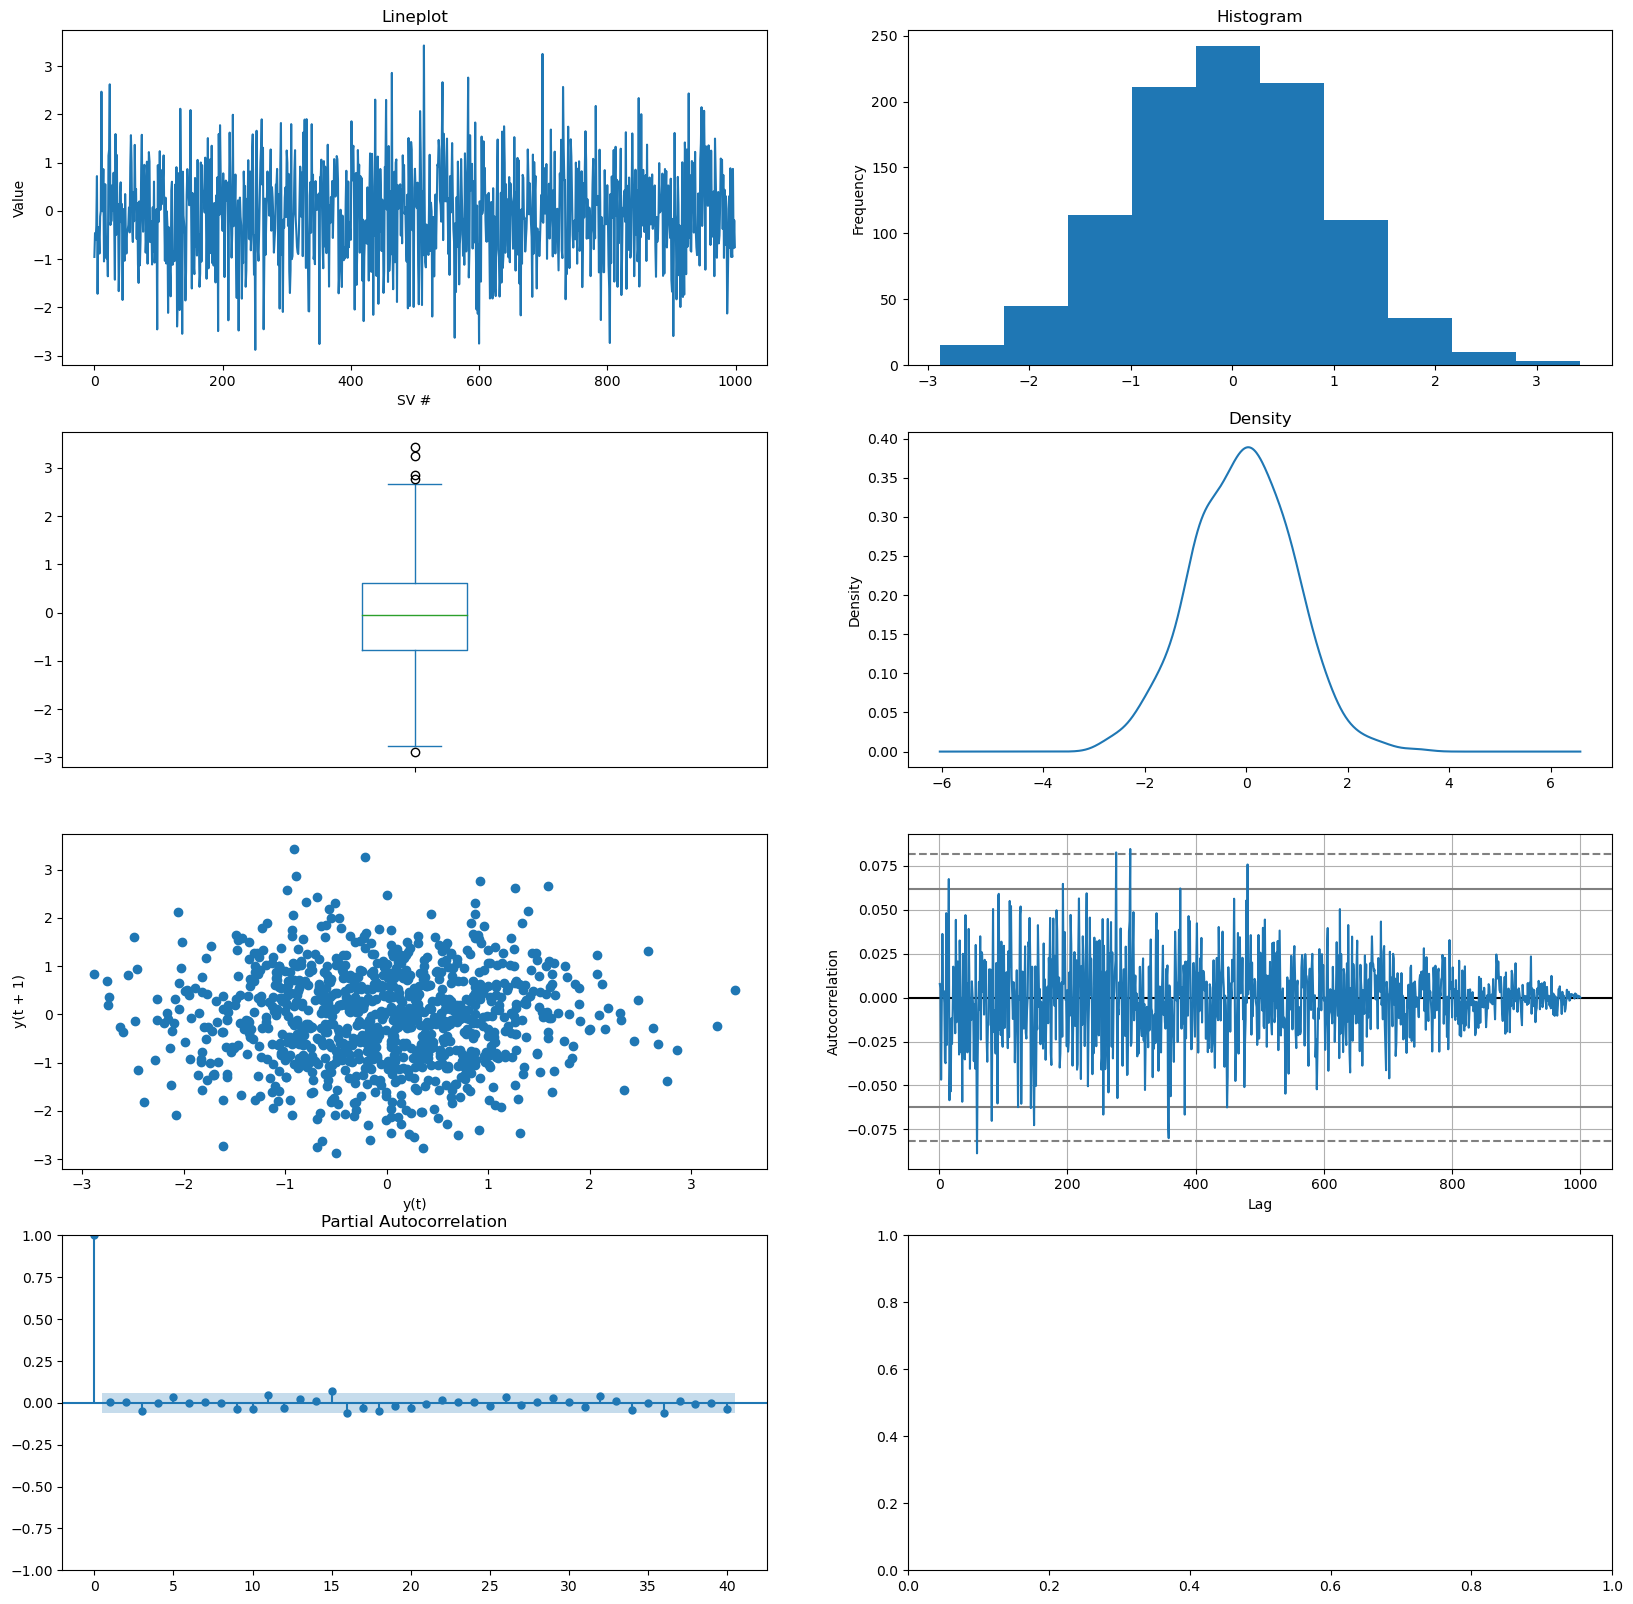

In [51]:
# seed the random number generator
seed(10)
# create white noise series
series = Series([gauss(0.0, 1.0) for _ in range(1000)])
# Mean and standard deviation
print("MEAN:", series.mean())
print("STDDEV:", series.std())
plot_all(series, rows=4, cols=2)

### 1.1.2

MEAN: 0.0033041176413629446
STDDEV: 0.09791546516302142


/home/zanilicious/anaconda3/envs/IL2233/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


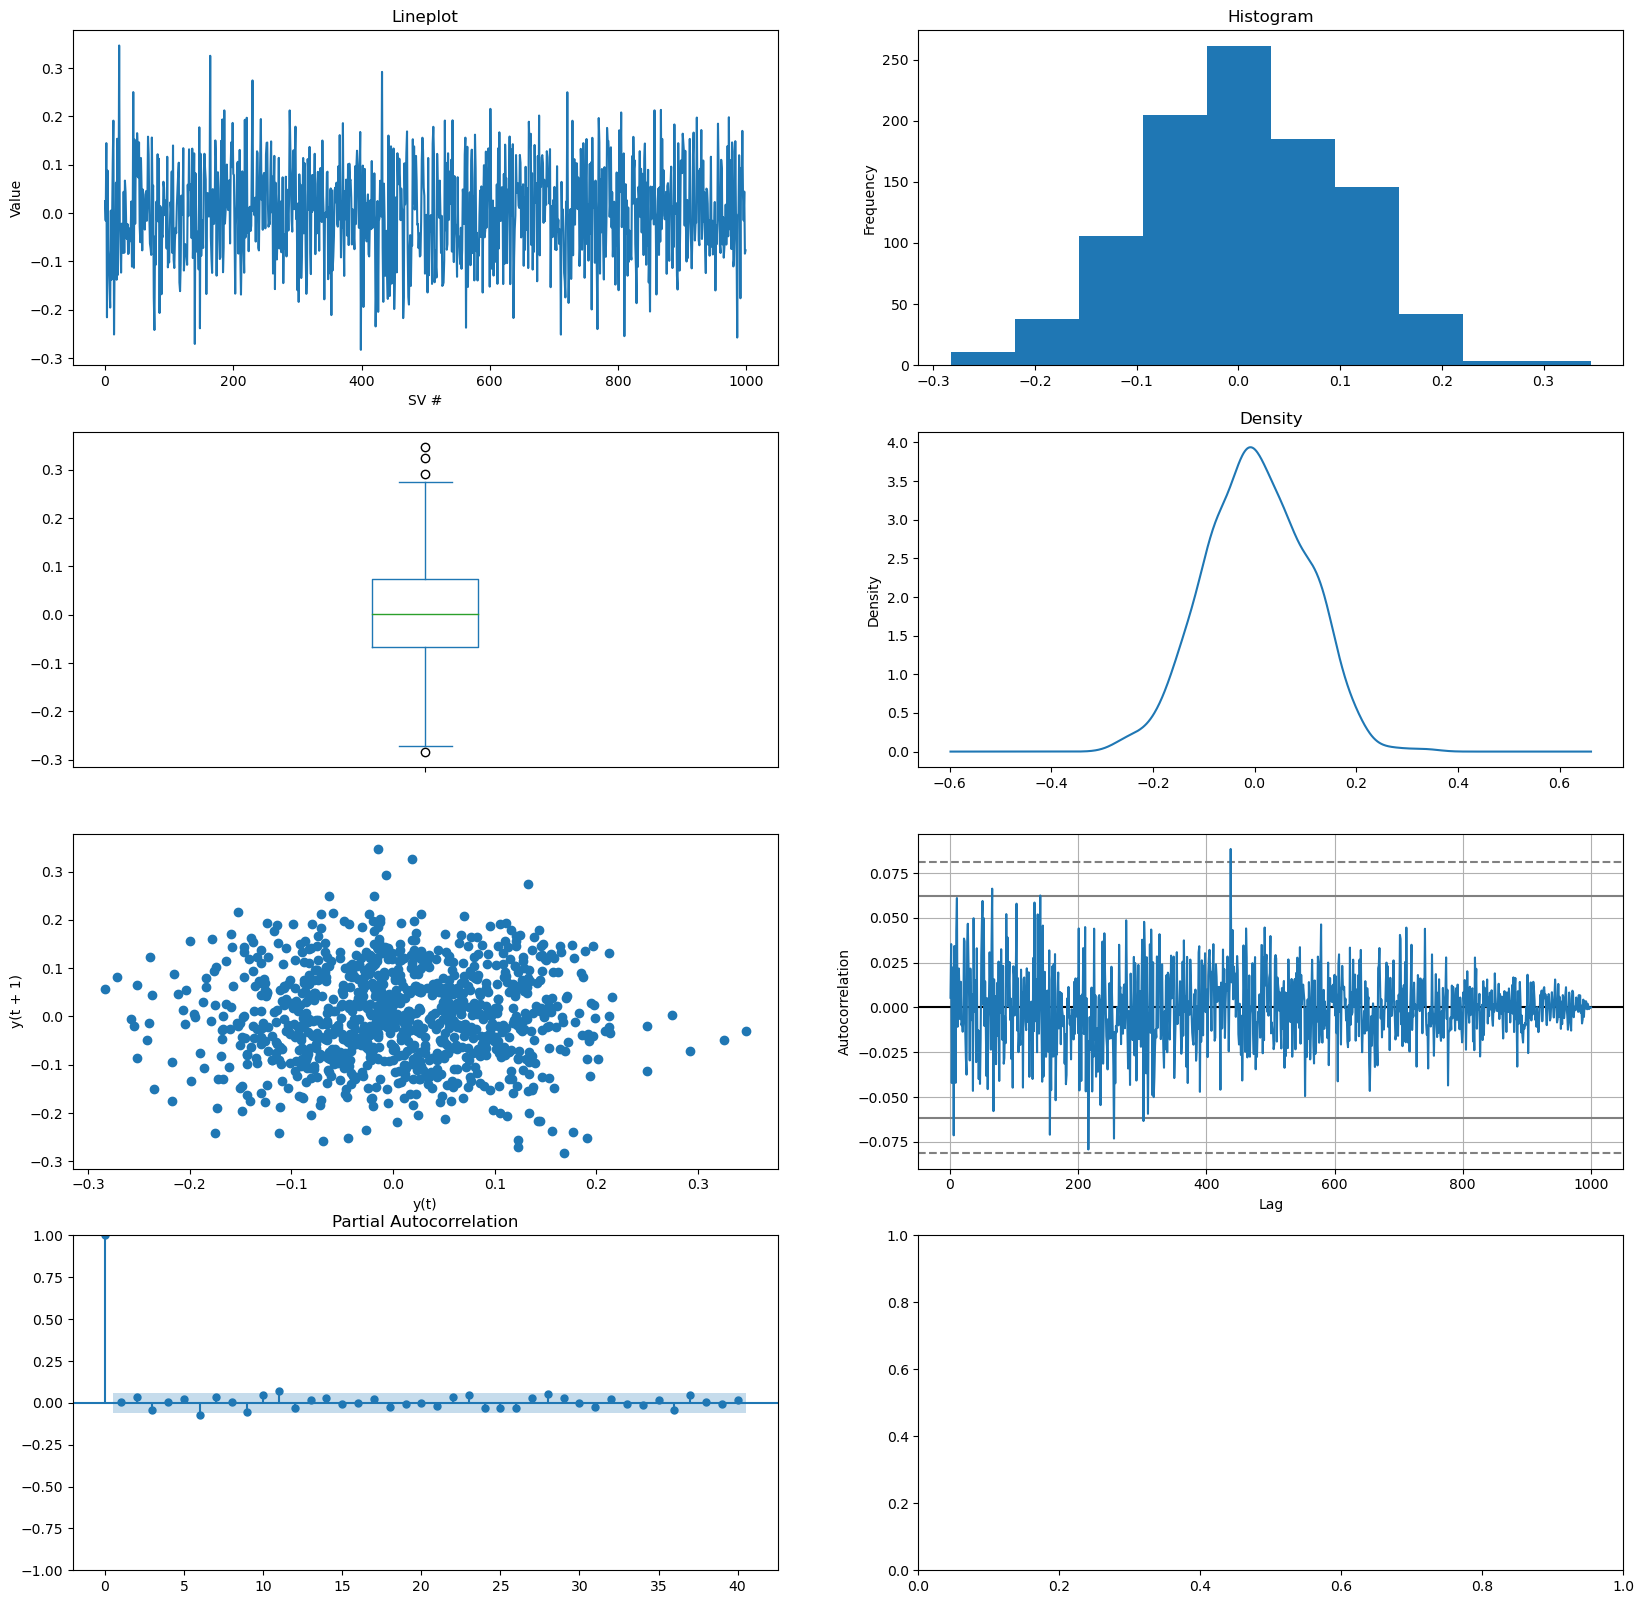

In [52]:
series_100 = [[gauss(0.0, 1.0) for _ in range(1000)] for _ in range(100)]
series_100_avg = []
for i in range(1000):
    sum = 0
    for j in range(100):
        sum += series_100[j][i]
    series_100_avg.append(sum / 100)
series_100_avg = Series(series_100_avg)

# Mean and standard deviation
print("MEAN:", series_100_avg.mean())
print("STDDEV:", series_100_avg.std())
plot_all(series_100_avg, rows=4, cols=2)

### 1.1.3

The results below show that the calculated probabilities for the varying lag are set above the threshold of 0.05. It can be observed that the data is randomly distributed.

In [58]:
sm.stats.acorr_ljungbox(series_100_avg)

,lb_stat,lb_pvalue
1,0.029767,0.863020
2,1.287263,0.525381
3,3.072530,0.380577
4,3.111408,0.539358
5,3.616514,0.605836
6,8.757487,0.187683
7,9.945298,0.191695
8,9.948899,0.268631
9,11.740194,0.228355
10,13.597836,0.192138


### 1.1.4
For the results below, we find that the ADF statistic is lower than the critical values and that the p-value remains lower than significant value and thus we consider that the data is stationary

In [57]:
result = adfuller(series_100_avg, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'{key}, {value}')


ADF Statistic: -9.025475788812402
p-value: 5.6255555472623464e-15
Critial Values:
1%, -3.436979275944879
Critial Values:
5%, -2.8644668170148058
Critial Values:
10%, -2.5683283824496153
